In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df_base = pd.read_csv("../data/gradient_norm_cifar_10C_resnet_2023_05_31-05_32_33_PM.csv", header=None)
df_mixup = pd.read_csv("../data/gradient_norm_cifar_10C_resnet_mixup_2023_06_01-10_26_28_AM.csv", header=None)

df_base_eh = pd.read_csv("../data/cifar_10C_resnet_2023_05_31-05_32_30_PM.csv", header=None)
df_mixup_eh = pd.read_csv("../data/cifar_10C_resnet_mixup_2023_06_01-10_26_24_AM.csv", header=None)

In [3]:
def func_clean_grad(df, minn=0, maxx=259):
    means = []
    for i, row in df.iterrows():
        arr_row = row.to_numpy()[1:]
        means.append(arr_row[minn:maxx].mean())
    return means

In [4]:
def func_clean_eh(df):
    index = []
    for i, row in df.iterrows():
        arr_row = row.to_numpy()
        arr_row = [int(re.findall(r'\d+',str(x))[0]) for x in arr_row]
        target = arr_row[0]
        for idx, i in enumerate(reversed(arr_row[1:])):
            if target == i:
                if idx == len(arr_row[1:])-1:
                    index.append(0)
                    break
                continue
            elif target != i and idx == 0:
                index.append(260)
                break
            elif target != i:
                index.append(len(arr_row)-idx-1)
                break
            elif target == i and idx == len(arr_row[1:])-1:
                index.append(0)
    return index

In [5]:
df_base_grad_means = func_clean_grad(df_base, 210, 260)
df_mixup_grad_means = func_clean_grad(df_mixup, 210, 260)

df_base_converted = func_clean_eh(df_base_eh)
df_mixup_converted = func_clean_eh(df_mixup_eh)

In [6]:
buckets_base = {
    'easy': [],
    'mid': [],
    'hard': [],
}

for mean, eh in zip(df_base_grad_means, df_base_converted):
    if (eh >= 0) and (eh <= 90):
        buckets_base['easy'].append(mean)
    elif (eh > 90) and (eh <= 175):
        buckets_base['mid'].append(mean)
    elif (eh > 175) and (eh <= 260):
        buckets_base['hard'].append(mean)

buckets_mixup = {
    'easy': [],
    'mid': [],
    'hard': [],
}

for mean, eh in zip(df_mixup_grad_means, df_mixup_converted):
    if (eh >= 0) and (eh <= 90):
        buckets_mixup['easy'].append(mean)
    elif (eh > 90) and (eh <= 175):
        buckets_mixup['mid'].append(mean)
    elif (eh > 175) and (eh <= 260):
        buckets_mixup['hard'].append(mean)

In [7]:
print(np.array(buckets_base['easy']).mean(), np.array(buckets_mixup['easy']).mean())
print(np.array(buckets_base['mid']).mean(), np.array(buckets_mixup['mid']).mean())
print(np.array(buckets_base['hard']).mean(), np.array(buckets_mixup['hard']).mean())

0.43104611534496334 2.7618044940932207
5.0713007737767795 11.378061840021823
14.683827486344827 27.216009169275196


| * 0 - 20 * | base| mixup  |
|------------|---|---|
| easy       | 7.773303394612475  | 8.27825694066878 |
| mid        | 18.290638641319582 | 17.592421178510616 |
| hard       | 24.18711147411581  | 22.289547751122424 |

| * 20 - 90 * | base               | mixup  |
|-------------|--------------------|---|
| easy        | 3.8802124358915933 | 4.767047503356592 |
| mid         | 16.45337812301194  | 15.722333285190256 |
| hard        | 24.441304126566443 | 23.760879194378735 |

| * 90 - 150 * | base               | mixup  |
|--------------|--------------------|---|
| easy         | 0.6945777110380782 | 2.383452373303168 |
| mid          | 8.856339043743384 | 11.188399674823462 |
| hard         | 19.3842447790332   | 24.477187553708788 |

| * 150 - 210 * | base                                  | mixup              |
|---------------|---------------------------------------|--------------------|
| easy          | 0.6070071618785483                    | 2.8989046820248645 |
| mid           | 7.403963271510654 | 12.235454416802249 |
| hard          | 18.342847111852297 | 28.283990821063913 |

| * 210 - 260 * | base                                   | mixup              |
|---------------|----------------------------------------|--------------------|
| easy          | 0.43104611534496334 | 2.7618044940932207 |
| mid           | 5.0713007737767795 | 11.378061840021823 |
| hard          | 14.683827486344827 | 27.216009169275196 |

In [8]:
# Define the table data
table_data = [
    [7.773303394612475, 8.27825694066878],
    [18.290638641319582, 17.592421178510616],
    [24.18711147411581, 22.289547751122424],
    [3.8802124358915933, 4.767047503356592],
    [16.45337812301194, 15.722333285190256],
    [24.441304126566443, 23.760879194378735],
    [0.6945777110380782, 2.383452373303168],
    [8.856339043743384, 11.188399674823462],
    [19.3842447790332, 24.477187553708788],
    [0.6070071618785483, 2.8989046820248645],
    [7.403963271510654, 12.235454416802249],
    [18.342847111852297, 28.283990821063913],
    [0.43104611534496334, 2.7618044940932207],
    [5.0713007737767795, 11.378061840021823],
    [14.683827486344827, 27.216009169275196]
]

# Extract arrays for each category
easy_base = [row[0] for row in table_data[::3]]
easy_mixup = [row[1] for row in table_data[::3]]

mid_base = [row[0] for row in table_data[1::3]]
mid_mixup = [row[1] for row in table_data[1::3]]

hard_base = [row[0] for row in table_data[2::3]]
hard_mixup = [row[1] for row in table_data[2::3]]

# Print the extracted arrays
print("easy_base:", easy_base)
print("easy_mixup:", easy_mixup)
print("mid_base:", mid_base)
print("mid_mixup:", mid_mixup)
print("hard_base:", hard_base)
print("hard_mixup:", hard_mixup)

easy_base: [7.773303394612475, 3.8802124358915933, 0.6945777110380782, 0.6070071618785483, 0.43104611534496334]
easy_mixup: [8.27825694066878, 4.767047503356592, 2.383452373303168, 2.8989046820248645, 2.7618044940932207]
mid_base: [18.290638641319582, 16.45337812301194, 8.856339043743384, 7.403963271510654, 5.0713007737767795]
mid_mixup: [17.592421178510616, 15.722333285190256, 11.188399674823462, 12.235454416802249, 11.378061840021823]
hard_base: [24.18711147411581, 24.441304126566443, 19.3842447790332, 18.342847111852297, 14.683827486344827]
hard_mixup: [22.289547751122424, 23.760879194378735, 24.477187553708788, 28.283990821063913, 27.216009169275196]


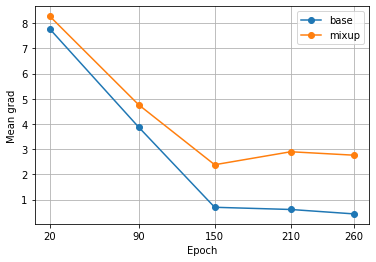

In [17]:
# Plotting
categories = ['easy', 'mid', 'hard']
x = [20, 90, 150, 210, 260]

plt.plot(x, easy_base, marker='o', label='base')
plt.plot(x, easy_mixup, marker='o', label='mixup')
#plt.plot(x, mid_base, marker='o', label='base')
#plt.plot(x, mid_mixup, marker='o', label='mixup')
#plt.plot(x, hard_base, marker='o', label='base')
#plt.plot(x, hard_mixup, marker='o', label='mixup')

plt.xlabel('Epoch')
plt.ylabel('Mean grad')
plt.xticks(x)
plt.legend()
plt.grid(True)
plt.savefig("grad_eh.png")
plt.show()

“Mixup usuwa proste cechy z prostych przykladow aby pozyczyc je do trudnych przykladow”

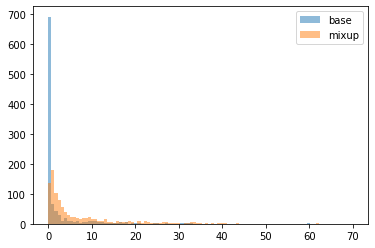

In [66]:
import random
import numpy
from matplotlib import pyplot

x = df_base_grad_means
y = df_mixup_grad_means

bins = numpy.linspace(0, 70, 100)

pyplot.hist(x, bins, alpha=0.5, label='base')
pyplot.hist(y, bins, alpha=0.5, label='mixup')
pyplot.legend(loc='upper right')
pyplot.show()